In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter

paths = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
for path in paths[:50]:
    print(path)

/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/106_cyt01.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/094_cyt02.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/001_cyt08.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/019_nuc09.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/045_nuc02.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/096_nuc08.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/042_nuc01.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/034_nuc05.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/041_nuc05.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/096_nuc07.dat
/kaggle/input/cervical-cancer-largest-dataset-sipa

In [2]:

folders=['im_Dyskeratotic','im_Koilocytotic','im_Metaplastic','im_Parabasal','im_Superficial-Intermediate']
for f in folders:
    data_dir = f"/kaggle/input/cervical-cancer-largest-dataset-sipakmed/{f}"
    class_counts = {
        cls: len(os.listdir(os.path.join(data_dir, cls)))
        for cls in os.listdir(data_dir)
    }
    print(class_counts)



{'im_Dyskeratotic': 1850}
{'im_Koilocytotic': 1889}
{'im_Metaplastic': 1858}
{'im_Parabasal': 1683}
{'im_Superficial-Intermediate': 1789}


In [3]:
BASE_DIR = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
CLASSES = [
    "im_Dyskeratotic",
    "im_Koilocytotic",
    "im_Metaplastic",
    "im_Parabasal",
    "im_Superficial-Intermediate"
]

IMAGE_DIRS = {
    cls: os.path.join(BASE_DIR, cls, cls, "CROPPED")
    for cls in CLASSES
}
class_counts = {
    cls: len([f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")])
    for cls in CLASSES
}

class_counts


{'im_Dyskeratotic': 813,
 'im_Koilocytotic': 825,
 'im_Metaplastic': 793,
 'im_Parabasal': 787,
 'im_Superficial-Intermediate': 831}

(np.float64(-0.5), np.float64(236.5), np.float64(249.5), np.float64(-0.5))

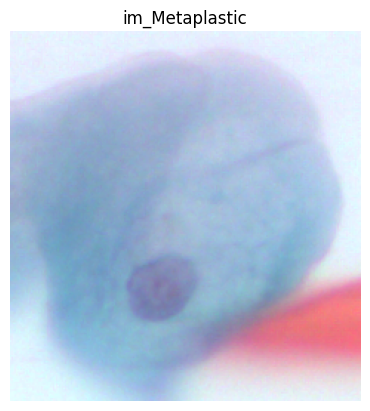

In [4]:
import random
import matplotlib.pyplot as plt
from PIL import Image

cls = random.choice(CLASSES)
img_name = random.choice([
    f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")
])

img = Image.open(os.path.join(IMAGE_DIRS[cls], img_name))

plt.imshow(img)
plt.title(cls)
plt.axis("off")


## class distribution

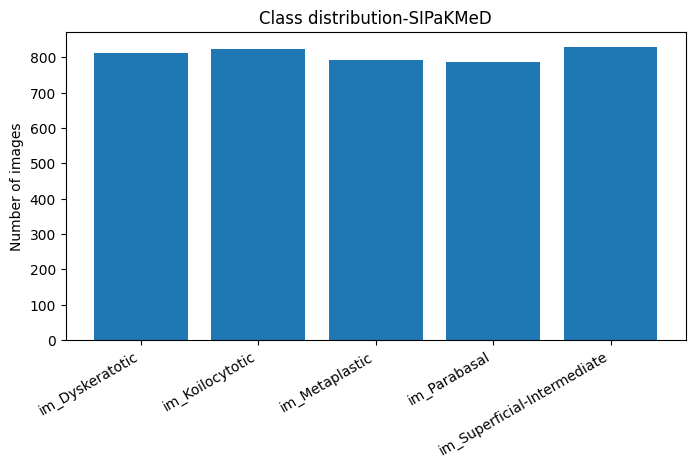

In [5]:
plt.figure(figsize=(8,4))
plt.bar(class_counts.keys(),class_counts.values())
plt.xticks(rotation=30,ha="right")
plt.title("Class distribution-SIPaKMeD")
plt.ylabel("Number of images")
plt.show()

## random samples

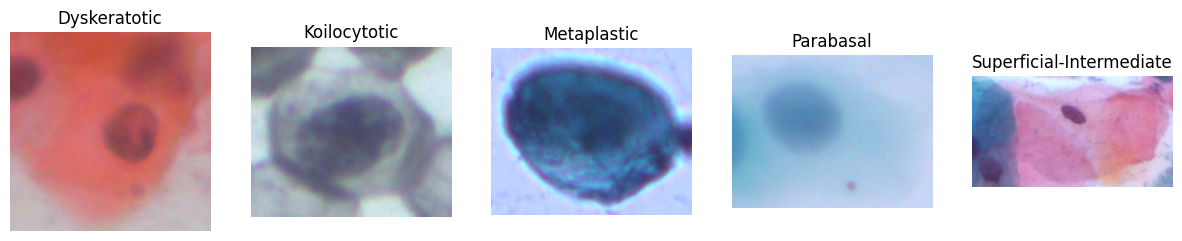

In [6]:
fig,axes=plt.subplots(1,5,figsize=(15,3))

for ax,cls in zip(axes,CLASSES):
    img_name=random.choice([
        f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")
    ])
    img=Image.open(os.path.join(IMAGE_DIRS[cls],img_name))
    ax.imshow(img)
    ax.set_title(cls.replace("im_",""))
    ax.axis("off")

plt.show()


## pixel instensity distribution

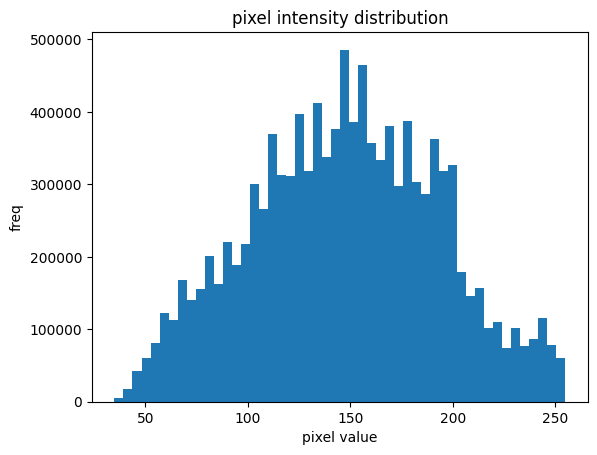

In [7]:
import numpy as np

pixels=[]

for cls in CLASSES:
    imgs = [f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")][:45]

    for img_name in imgs:
        img=Image.open(os.path.join(IMAGE_DIRS[cls],img_name)).convert("L")
        pixels.append(np.array(img).flatten())

pixels=np.concatenate(pixels)

plt.hist(pixels, bins=50)
plt.title("pixel intensity distribution")
plt.xlabel("pixel value")
plt.ylabel("freq")
plt.show()


## Image sizes

In [8]:
import random
import numpy as np

sample_shapes = []

for cls in CLASSES:
    img_names = [f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")]
    sampled_imgs = random.sample(img_names, 20)
    
    for img_name in sampled_imgs:
        img_path = os.path.join(IMAGE_DIRS[cls], img_name)
        img = Image.open(img_path)
        arr = np.array(img)
        sample_shapes.append(arr.shape)

set(sample_shapes)


{(73, 118, 3),
 (74, 111, 3),
 (76, 103, 3),
 (80, 90, 3),
 (81, 90, 3),
 (82, 81, 3),
 (82, 116, 3),
 (83, 114, 3),
 (87, 89, 3),
 (90, 99, 3),
 (92, 169, 3),
 (94, 97, 3),
 (99, 87, 3),
 (110, 142, 3),
 (112, 135, 3),
 (113, 120, 3),
 (119, 120, 3),
 (119, 125, 3),
 (120, 149, 3),
 (121, 105, 3),
 (122, 134, 3),
 (123, 120, 3),
 (124, 87, 3),
 (124, 176, 3),
 (126, 163, 3),
 (128, 114, 3),
 (129, 160, 3),
 (130, 138, 3),
 (130, 149, 3),
 (132, 103, 3),
 (132, 254, 3),
 (133, 162, 3),
 (134, 128, 3),
 (134, 211, 3),
 (135, 195, 3),
 (136, 382, 3),
 (137, 150, 3),
 (138, 142, 3),
 (139, 103, 3),
 (140, 111, 3),
 (141, 150, 3),
 (148, 174, 3),
 (148, 181, 3),
 (151, 196, 3),
 (153, 124, 3),
 (154, 149, 3),
 (155, 232, 3),
 (156, 145, 3),
 (156, 205, 3),
 (157, 191, 3),
 (165, 113, 3),
 (165, 253, 3),
 (165, 350, 3),
 (167, 149, 3),
 (170, 180, 3),
 (173, 288, 3),
 (176, 269, 3),
 (177, 230, 3),
 (178, 228, 3),
 (182, 214, 3),
 (184, 313, 3),
 (186, 200, 3),
 (187, 285, 3),
 (188, 153, 3

## variable image sizes

In [9]:
import torch
from torchvision import transforms
from PIL import Image

resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()   #converts to [0,1]  (C,H,W)
])


In [10]:
cls = random.choice(CLASSES)
img_name = random.choice([
    f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")
])

img_path = os.path.join(IMAGE_DIRS[cls], img_name)
img = Image.open(img_path).convert("RGB")

img_resized = resize_transform(img)

img_resized.shape


torch.Size([3, 224, 224])

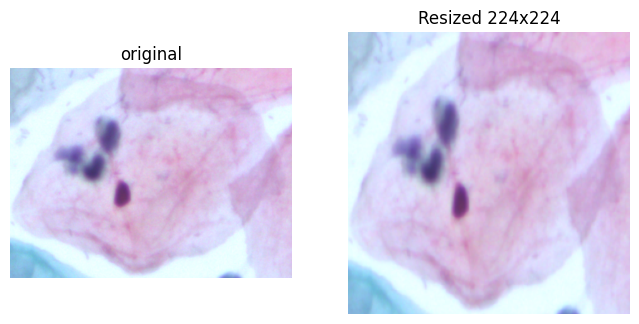

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_resized.permute(1,2,0))
plt.title("Resized 224x224")
plt.axis("off")

plt.show()


### Mean Image per Class

In [12]:
mean_images = {}

for cls in CLASSES:
    img_names = [f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")]
    sampled_imgs = img_names[:200]
    
    imgs_tensor = []

    for img_name in sampled_imgs:
        img_path = os.path.join(IMAGE_DIRS[cls], img_name)
        img = Image.open(img_path).convert("RGB")
        img_resized = resize_transform(img)
        imgs_tensor.append(img_resized)

    imgs_tensor = torch.stack(imgs_tensor)
    mean_images[cls] = imgs_tensor.mean(dim=0)


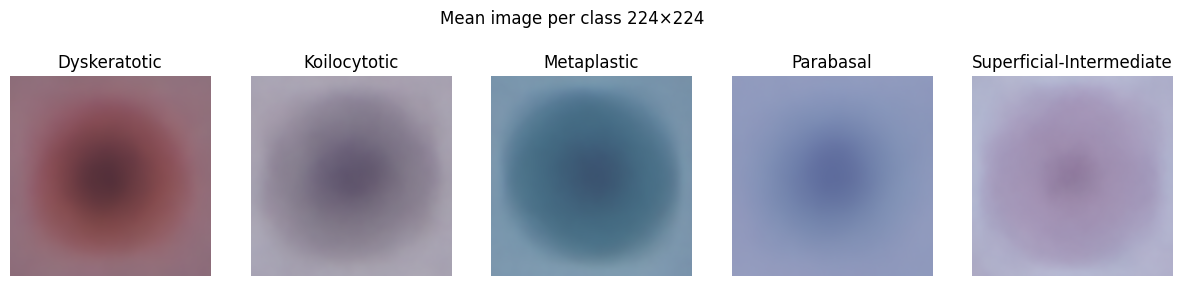

In [13]:
plt.figure(figsize=(15, 3))

for i, cls in enumerate(CLASSES):
    plt.subplot(1, len(CLASSES), i + 1)
    mean_img = mean_images[cls].permute(1, 2, 0).numpy()
    plt.imshow(mean_img)
    plt.title(cls.replace("im_", ""))
    plt.axis("off")

plt.suptitle("Mean image per class 224×224", y=1.05)
plt.show()

In [14]:
rgb_pixels={
    cls:{"R":[], "G":[], "B":[]}
    for cls in CLASSES
}

for cls in CLASSES:
    img_names = [f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")]
    sampled_imgs = img_names[:50]

    for img_name in sampled_imgs:
        img_path = os.path.join(IMAGE_DIRS[cls], img_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = resize_transform(img)

        rgb_pixels[cls]["R"].append(img_tensor[0].flatten().numpy())
        rgb_pixels[cls]["G"].append(img_tensor[1].flatten().numpy())
        rgb_pixels[cls]["B"].append(img_tensor[2].flatten().numpy())


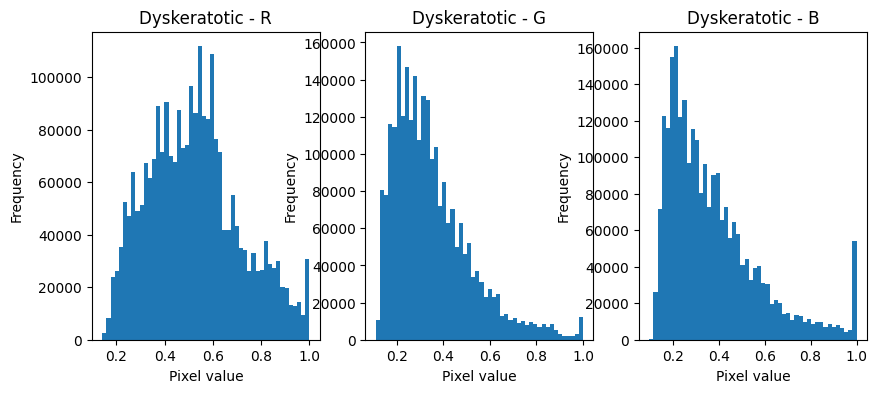

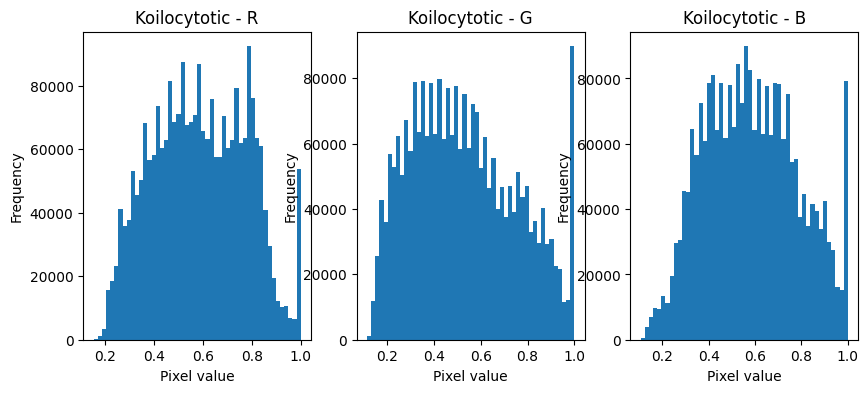

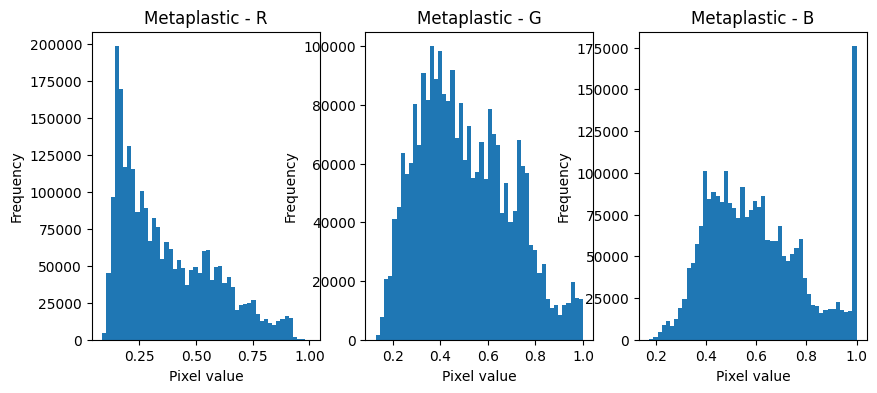

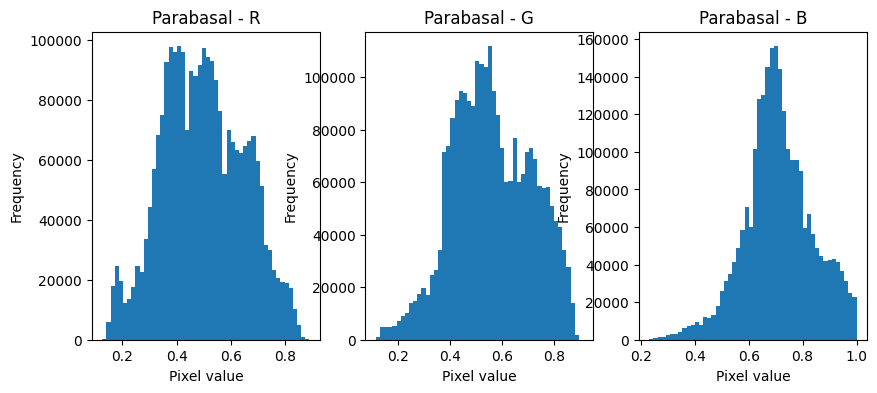

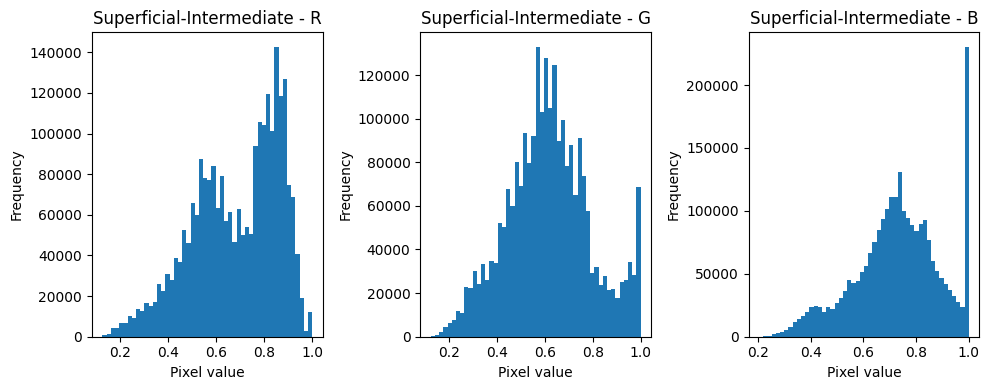

In [15]:
for cls in CLASSES:
    plt.figure(figsize=(10,4))
    
    for i, channel in enumerate(["R", "G", "B"]):
        plt.subplot(1,3,i+1)
        pixels = np.concatenate(rgb_pixels[cls][channel])
        plt.hist(pixels, bins=50)
        plt.title(f"{cls.replace('im_','')} - {channel}")
        plt.xlabel("Pixel value")
        plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## augmentation requried?

In [16]:
from torchvision import transforms

augment_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(
        brightness=0.1,
        contrast=0.1
    ),
    transforms.ToTensor()
])

cls = random.choice(CLASSES)
img_name = random.choice([
    f for f in os.listdir(IMAGE_DIRS[cls]) if f.endswith(".bmp")
])

img_path = os.path.join(IMAGE_DIRS[cls], img_name)
img = Image.open(img_path).convert("RGB")


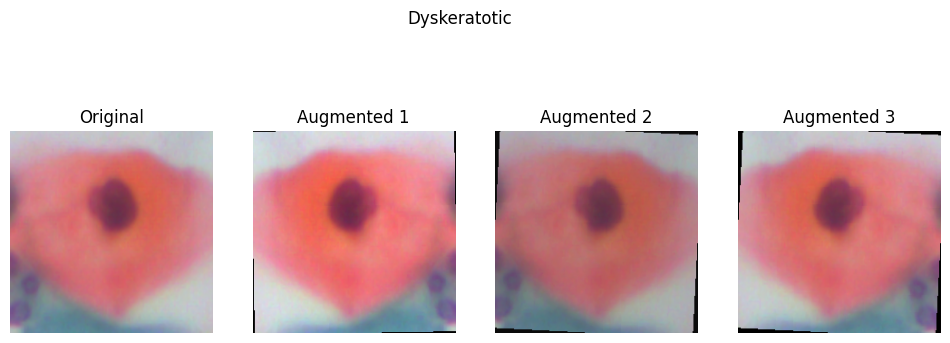

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(transforms.Resize((224,224))(img))
plt.title("Original")
plt.axis("off")

for i in range(3):
    aug_img = augment_transform(img)
    plt.subplot(1,4,i+2)
    plt.imshow(aug_img.permute(1,2,0))
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.suptitle(cls.replace("im_",""), y=1.05)
plt.show()


## 80-20 train/val split

In [18]:
from sklearn.model_selection import train_test_split

image_paths = []
labels = []

for label, cls in enumerate(CLASSES):
    img_dir = IMAGE_DIRS[cls]
    for img_name in os.listdir(img_dir):
        if img_name.endswith(".bmp"):
            image_paths.append(os.path.join(img_dir, img_name))
            labels.append(label)


In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    image_paths,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=42
)


In [20]:
from collections import Counter

print("Train class distribution:",Counter(y_train))
print("Val class distribution:",Counter(y_val))

Train class distribution: Counter({4: 665, 1: 660, 0: 650, 2: 634, 3: 630})
Val class distribution: Counter({4: 166, 1: 165, 0: 163, 2: 159, 3: 157})


## classical ML: Logistics regression

In [21]:
baseline_transforms=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.Grayscale(),
])
def extract_features(image_paths):
    features=[]
    for path in image_paths:
        img=Image.open(path).convert('RGB')
        img=baseline_transforms(img)
        features.append(np.array(img).flatten())
    return np.array(features)
        


In [22]:
X_train_feat=extract_features(X_train)
X_val_feat=extract_features(X_val)

In [23]:
X_train_feat=X_train_feat/255.0
X_val_feat=X_val_feat/255.0

In [24]:
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

lr=LogisticRegression(max_iter=3000,n_jobs=-1)
lr.fit(X_train_feat,y_train)

LogisticRegression(max_iter=3000, n_jobs=-1)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred = lr.predict(X_val_feat)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=CLASSES))


Validation Accuracy: 0.5950617283950618
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.56      0.67      0.61       163
            im_Koilocytotic       0.50      0.38      0.43       165
             im_Metaplastic       0.51      0.42      0.46       159
               im_Parabasal       0.61      0.81      0.70       157
im_Superficial-Intermediate       0.76      0.70      0.73       166

                   accuracy                           0.60       810
                  macro avg       0.59      0.60      0.59       810
               weighted avg       0.59      0.60      0.59       810



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_feat,y_train)

y_val_pred_rf = rf.predict(X_val_feat)

print("Random Forest Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))

Random Forest Accuracy: 0.717283950617284
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       163
           1       0.71      0.59      0.64       165
           2       0.67      0.60      0.64       159
           3       0.77      0.89      0.82       157
           4       0.75      0.86      0.80       166

    accuracy                           0.72       810
   macro avg       0.71      0.72      0.71       810
weighted avg       0.71      0.72      0.71       810



In [27]:
from torch.utils.data import Dataset

class CervicalDataset(Dataset):
    def __init__(self,image_paths,labels,transform=None):
        self.image_paths=image_paths
        self.labels=labels
        self.transform=transform
    def __len__(self):
        return len(self.image_paths)
    def __getitem__(self,idx):
        img=Image.open(self.image_paths[idx]).convert('RGB')
        if self.transform:
            img=self.transform(img)
        label=self.labels[idx]
        return img,label

In [28]:
dataset = CervicalDataset(X_train, y_train)
img, label = dataset[0]

print(type(img), label)


<class 'PIL.Image.Image'> 2


In [29]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader

class SimpleCNN(nn.Module):
    def __init__(self,num_classes=5):
        super().__init__()
        self.features=nn.Sequential(
            nn.Conv2d(3,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64,128,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier=nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(128,num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

In [30]:
# train_transform=transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(brightness=0.1, contrast=0.1),
#     transforms.ToTensor()    
# ])

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [31]:
dataset = CervicalDataset(X_train, y_train, transform=train_transform)
img, label = dataset[0]

print(img.shape, label)


torch.Size([3, 224, 224]) 2


In [32]:
train_dataset = CervicalDataset(
    image_paths=X_train,
    labels=y_train,
    transform=train_transform
)

val_dataset = CervicalDataset(
    image_paths=X_val,
    labels=y_val,
    transform=val_transform
)

In [33]:
img, label = train_dataset[0]
print(img.shape, label)

torch.Size([3, 224, 224]) 2


In [34]:
from torch.utils.data import DataLoader

train_loader=DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

val_loader=DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

In [35]:
imgs, labels = next(iter(train_loader))
print(imgs.shape, labels.shape)


torch.Size([32, 3, 224, 224]) torch.Size([32])


In [36]:
model=SimpleCNN(num_classes=5)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In [37]:
imgs, labels = next(iter(train_loader))
imgs = imgs.to(device)

outputs = model(imgs)
print(outputs.shape)

torch.Size([32, 5])


In [38]:
def accuracy_fn(outputs,labels):
    preds=outputs.argmax(dim=1)
    correct =(preds==labels).sum().item()
    return correct/labels.size(0)


In [39]:
def train_one_epoch(model,train_loader,criterion,optimizer,device):
    model.train()
    running_loss=0.0
    running_acc=0.0

    for imgs,labels in train_loader:
        imgs=imgs.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        outputs=model(imgs)

        loss=criterion(outputs,labels)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        running_acc+=accuracy_fn(outputs, labels)

    epoch_loss=running_loss/len(train_loader)
    epoch_acc=running_acc/len(train_loader)

    return epoch_loss, epoch_acc

In [40]:
def validate_one_epoch(model, val_loader, criterion, device):
    model.eval()
    
    running_loss = 0.0
    running_acc = 0.0

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            outputs = model(imgs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            running_acc += accuracy_fn(outputs, labels)

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = running_acc / len(val_loader)

    return epoch_loss, epoch_acc

## CNN baseline V1

In [41]:
num_epochs=20
for epoch in range(num_epochs):
    train_loss,train_acc=train_one_epoch(model,train_loader,criterion,optimizer,device)
    val_loss,val_acc=validate_one_epoch(model,val_loader,criterion,device)

    print(
            f"Epoch [{epoch+1}/{num_epochs}] | "
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
            f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
        )

Epoch [1/20] | Train Loss: 1.2607, Train Acc: 0.4555 | Val Loss: 1.0220, Val Acc: 0.6704
Epoch [2/20] | Train Loss: 1.0038, Train Acc: 0.6188 | Val Loss: 0.9913, Val Acc: 0.5731
Epoch [3/20] | Train Loss: 0.9212, Train Acc: 0.6552 | Val Loss: 0.8352, Val Acc: 0.7207
Epoch [4/20] | Train Loss: 0.8683, Train Acc: 0.6803 | Val Loss: 0.7748, Val Acc: 0.7373
Epoch [5/20] | Train Loss: 0.8232, Train Acc: 0.6870 | Val Loss: 0.7647, Val Acc: 0.7387
Epoch [6/20] | Train Loss: 0.7906, Train Acc: 0.7085 | Val Loss: 0.7018, Val Acc: 0.7433
Epoch [7/20] | Train Loss: 0.7417, Train Acc: 0.7285 | Val Loss: 0.6911, Val Acc: 0.7697
Epoch [8/20] | Train Loss: 0.7287, Train Acc: 0.7285 | Val Loss: 0.7328, Val Acc: 0.7274
Epoch [9/20] | Train Loss: 0.7196, Train Acc: 0.7351 | Val Loss: 0.6618, Val Acc: 0.7805
Epoch [10/20] | Train Loss: 0.7190, Train Acc: 0.7491 | Val Loss: 0.6400, Val Acc: 0.7757
Epoch [11/20] | Train Loss: 0.7034, Train Acc: 0.7467 | Val Loss: 0.6019, Val Acc: 0.7877
Epoch [12/20] | Tra

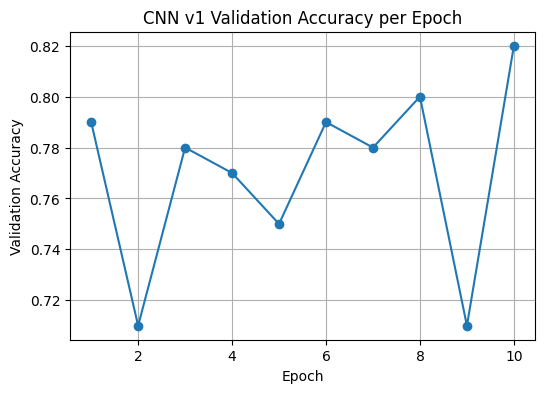

In [42]:
import matplotlib.pyplot as plt
# store training history manually
epochs = [1, 2, 3, 4, 5,6,7,8,9,10]
val_accuracies = [0.79, 0.71, 0.78, 0.77, 0.75,0.79,0.78,0.80,0.71,0.82]

plt.figure(figsize=(6, 4))
plt.plot(epochs, val_accuracies, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("CNN v1 Validation Accuracy per Epoch")
plt.grid(True)

plt.show()

## CNN v2 with batch norm, dropout

In [43]:
import torch.nn as nn

class SimpleCNNv2(nn.Module):
    def __init__(self,num_classes=5):
        super().__init__()
        
        self.features=nn.Sequential(
            nn.Conv2d(3,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier=nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.Linear(128,num_classes)
        )

    def forward(self,x):
        x=self.features(x)
        return self.classifier(x)


In [44]:
model=SimpleCNNv2(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)


In [45]:
num_epochs=20
for epoch in range(num_epochs):
    train_loss,train_acc=train_one_epoch(model,train_loader,criterion,optimizer,device)
    val_loss,val_acc=validate_one_epoch(model,val_loader,criterion,device)

    print(
            f"Epoch [{epoch+1}/{num_epochs}] | "
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
            f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
        )

Epoch [1/20] | Train Loss: 0.9058, Train Acc: 0.6685 | Val Loss: 0.6583, Val Acc: 0.7757
Epoch [2/20] | Train Loss: 0.7505, Train Acc: 0.7198 | Val Loss: 0.6640, Val Acc: 0.7745
Epoch [3/20] | Train Loss: 0.7120, Train Acc: 0.7391 | Val Loss: 0.6302, Val Acc: 0.7889
Epoch [4/20] | Train Loss: 0.6917, Train Acc: 0.7478 | Val Loss: 0.6401, Val Acc: 0.7469
Epoch [5/20] | Train Loss: 0.6967, Train Acc: 0.7433 | Val Loss: 0.7284, Val Acc: 0.6950
Epoch [6/20] | Train Loss: 0.6370, Train Acc: 0.7705 | Val Loss: 2.0771, Val Acc: 0.5832
Epoch [7/20] | Train Loss: 0.6311, Train Acc: 0.7713 | Val Loss: 0.5610, Val Acc: 0.8034
Epoch [8/20] | Train Loss: 0.5996, Train Acc: 0.7840 | Val Loss: 0.6073, Val Acc: 0.7700
Epoch [9/20] | Train Loss: 0.5738, Train Acc: 0.7948 | Val Loss: 2.3672, Val Acc: 0.6082
Epoch [10/20] | Train Loss: 0.5323, Train Acc: 0.8067 | Val Loss: 0.6396, Val Acc: 0.7514
Epoch [11/20] | Train Loss: 0.5241, Train Acc: 0.8172 | Val Loss: 1.5111, Val Acc: 0.6481
Epoch [12/20] | Tra

## Efficientnet B0

In [46]:
imagenet_mean=[0.485,0.456,0.406]
imagenet_std =[0.229,0.224,0.225]

val_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean,std=imagenet_std)
])

In [47]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

In [48]:
train_dataset=CervicalDataset(X_train,y_train,transform=train_transform)
val_dataset=CervicalDataset(X_val,y_val,transform=val_transform)

In [49]:
from torchvision.models import efficientnet_b0

model = efficientnet_b0(weights="IMAGENET1K_V1")

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 157MB/s]


In [50]:
in_features=model.classifier[1].in_features
model.classifier[1]=nn.Linear(in_features,5)

In [51]:
for param in model.features.parameters():
    param.requires_grad = False

In [52]:
model = model.to(device)

In [53]:
print(next(model.parameters()).device)

cuda:0


In [54]:
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.classifier.parameters(),
    lr=0.001
)

In [55]:
torch.save(model.state_dict(), "efficientnet_b0_cervical.pth")

In [56]:
for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(
        model, train_loader, criterion, optimizer, device
    )
    
    val_loss, val_acc = validate_one_epoch(
        model, val_loader, criterion, device
    )

    print(
        f"Epoch [{epoch+1}/{num_epochs}] | "
        f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
    )

Epoch [1/20] | Train Loss: 0.7918, Train Acc: 0.7528 | Val Loss: 0.4502, Val Acc: 0.8562
Epoch [2/20] | Train Loss: 0.4498, Train Acc: 0.8581 | Val Loss: 0.3557, Val Acc: 0.8745
Epoch [3/20] | Train Loss: 0.3907, Train Acc: 0.8713 | Val Loss: 0.3114, Val Acc: 0.9012
Epoch [4/20] | Train Loss: 0.3292, Train Acc: 0.8914 | Val Loss: 0.2671, Val Acc: 0.9060
Epoch [5/20] | Train Loss: 0.3128, Train Acc: 0.8906 | Val Loss: 0.2668, Val Acc: 0.9084
Epoch [6/20] | Train Loss: 0.2986, Train Acc: 0.8987 | Val Loss: 0.2537, Val Acc: 0.9120
Epoch [7/20] | Train Loss: 0.3088, Train Acc: 0.8912 | Val Loss: 0.2332, Val Acc: 0.9228
Epoch [8/20] | Train Loss: 0.2712, Train Acc: 0.9125 | Val Loss: 0.2313, Val Acc: 0.9192
Epoch [9/20] | Train Loss: 0.2757, Train Acc: 0.9041 | Val Loss: 0.2290, Val Acc: 0.9216
Epoch [10/20] | Train Loss: 0.2733, Train Acc: 0.9073 | Val Loss: 0.2176, Val Acc: 0.9180
Epoch [11/20] | Train Loss: 0.2672, Train Acc: 0.9034 | Val Loss: 0.2154, Val Acc: 0.9156
Epoch [12/20] | Tra

In [57]:
import torch
import numpy as np

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
cm

array([[157,   4,   0,   2,   0],
       [ 11, 139,  11,   1,   3],
       [  2,  11, 139,   5,   2],
       [  2,   1,   1, 152,   1],
       [  0,   2,   5,   0, 159]])

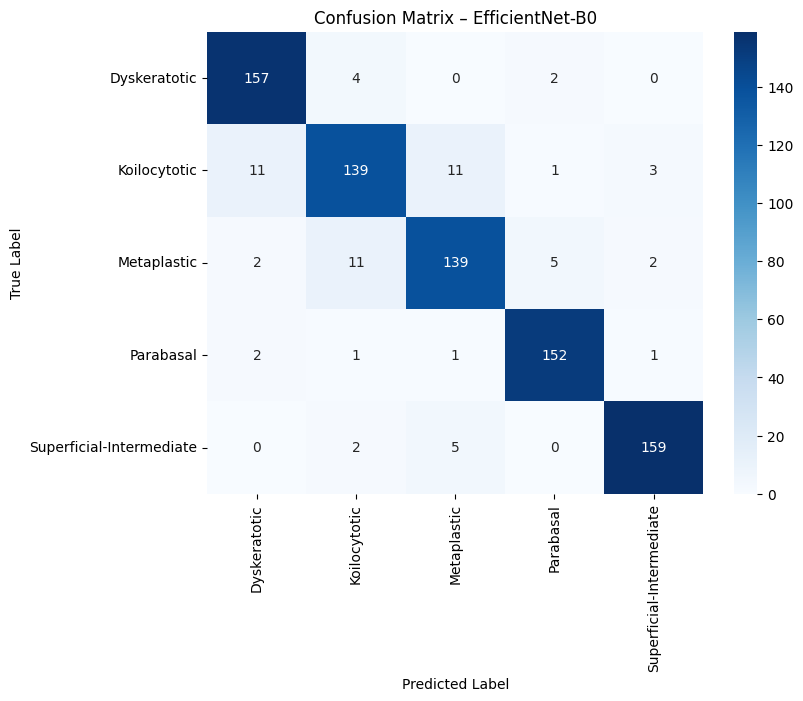

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[c.replace("im_","") for c in CLASSES],
    yticklabels=[c.replace("im_","") for c in CLASSES]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – EfficientNet-B0")
plt.show()


In [60]:
from sklearn.metrics import classification_report

print(
    classification_report(
        all_labels,
        all_preds,
        target_names=[c.replace("im_","") for c in CLASSES]
    )
)

                          precision    recall  f1-score   support

            Dyskeratotic       0.91      0.96      0.94       163
            Koilocytotic       0.89      0.84      0.86       165
             Metaplastic       0.89      0.87      0.88       159
               Parabasal       0.95      0.97      0.96       157
Superficial-Intermediate       0.96      0.96      0.96       166

                accuracy                           0.92       810
               macro avg       0.92      0.92      0.92       810
            weighted avg       0.92      0.92      0.92       810



In [61]:
import pandas as pd

model_performance = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "CNN v1 (Baseline)",
        "CNN v2 (Regularized)",
        "EfficientNet-B0 (Transfer Learning)"
    ],
    "Best Validation Accuracy": [
        0.59,   # LR
        0.72,   # RF
        0.82,   # CNN v1
        0.85,   # CNN v2
        0.92    # EfficientNet
    ],
    "Notes": [
        "Linear baseline using downsampled grayscale feat",
        "Nonlinear ensemble model w/o spatial awareness",
        "Custom CNN trained from scratch;learned spatial feat",
        "Regularized CNN w dropout,weight decay;improved generalization",
        "Pretrained EfficientNet-B0;best perf and stability"
    ]
})

model_performance


,Model,Best Validation Accuracy,Notes
0,Logistic Regression,0.59,Linear baseline using downsampled grayscale feat
1,Random Forest,0.72,Nonlinear ensemble model w/o spatial awareness
2,CNN v1 (Baseline),0.82,Custom CNN trained from scratch;learned spatia...
3,CNN v2 (Regularized),0.85,"Regularized CNN w dropout,weight decay;improve..."
4,EfficientNet-B0 (Transfer Learning),0.92,Pretrained EfficientNet-B0;best perf and stabi...


## same model with 3 way split of dataset:train, val, test

In [62]:
import os
from sklearn.model_selection import train_test_split
import numpy as np

BASE_DIR = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
CLASSES = [
    "im_Dyskeratotic",
    "im_Koilocytotic", 
    "im_Metaplastic",
    "im_Parabasal",
    "im_Superficial-Intermediate"
]

class_to_idx = {cls: idx for idx, cls in enumerate(CLASSES)}

image_paths = []
labels = []

for cls in CLASSES:
    cropped_dir = os.path.join(BASE_DIR, cls, cls, "CROPPED")
    files = [f for f in os.listdir(cropped_dir) if f.endswith(".bmp")]
    for f in files:
        image_paths.append(os.path.join(cropped_dir, f))
        labels.append(class_to_idx[cls])

image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Total images: {len(image_paths)}")
print(f"Class distribution: {np.bincount(labels)}")

Total images: 4049
Class distribution: [813 825 793 787 831]


In [63]:

X_train, X_temp, y_train, y_temp = train_test_split(
    image_paths,
    labels,
    test_size=0.30,
    stratify=labels,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,       
    stratify=y_temp,
    random_state=42
)

print(f"Train size: {len(X_train)}")
print(f"Val size:   {len(X_val)}")
print(f"Test size:  {len(X_test)}")
print(f"Train class dist: {np.bincount(y_train)}")
print(f"Val class dist:   {np.bincount(y_val)}")
print(f"Test class dist:  {np.bincount(y_test)}")

Train size: 2834
Val size:   607
Test size:  608
Train class dist: [569 577 555 551 582]
Val class dist:   [122 124 119 118 124]
Test class dist:  [122 124 119 118 125]


In [64]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

class CervicalDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

train_dataset = CervicalDataset(X_train, y_train, transform=transform)
val_dataset   = CervicalDataset(X_val,   y_val,   transform=transform)
test_dataset  = CervicalDataset(X_test,  y_test,  transform=transform)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

print("DataLoaders created successfully!")

DataLoaders created successfully!


In [65]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = efficientnet_b0(weights="IMAGENET1K_V1")

in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, 5)

for param in model.features.parameters():
    param.requires_grad = False

model = model.to(device)

print("Model prepared and moved to", device)

Model prepared and moved to cuda


In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)

def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / len(loader)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate_one_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / len(loader)
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

In [67]:
num_epochs = 20

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch [1/20] | Train Loss: 0.8344, Train Acc: 0.7336 | Val Loss: 0.4716, Val Acc: 0.8633
Epoch [2/20] | Train Loss: 0.4708, Train Acc: 0.8430 | Val Loss: 0.3675, Val Acc: 0.8797
Epoch [3/20] | Train Loss: 0.4021, Train Acc: 0.8673 | Val Loss: 0.3169, Val Acc: 0.9061
Epoch [4/20] | Train Loss: 0.3633, Train Acc: 0.8800 | Val Loss: 0.3012, Val Acc: 0.9028
Epoch [5/20] | Train Loss: 0.3161, Train Acc: 0.8966 | Val Loss: 0.2716, Val Acc: 0.9143
Epoch [6/20] | Train Loss: 0.3166, Train Acc: 0.8924 | Val Loss: 0.2601, Val Acc: 0.9176
Epoch [7/20] | Train Loss: 0.3064, Train Acc: 0.8966 | Val Loss: 0.2548, Val Acc: 0.9209
Epoch [8/20] | Train Loss: 0.2854, Train Acc: 0.9054 | Val Loss: 0.2472, Val Acc: 0.9176
Epoch [9/20] | Train Loss: 0.2827, Train Acc: 0.8991 | Val Loss: 0.2373, Val Acc: 0.9226
Epoch [10/20] | Train Loss: 0.2635, Train Acc: 0.9097 | Val Loss: 0.2323, Val Acc: 0.9176
Epoch [11/20] | Train Loss: 0.2600, Train Acc: 0.9132 | Val Loss: 0.2401, Val Acc: 0.9193
Epoch [12/20] | Tra

In [68]:
test_loss, test_acc = validate_one_epoch(model, test_loader, criterion, device)
print(f"\nFINAL TEST RESULTS:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


FINAL TEST RESULTS:
Test Loss: 0.1874, Test Accuracy: 0.9359


In [69]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def evaluate_model(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    return np.array(all_labels), np.array(all_preds)

In [70]:
y_true, y_pred = evaluate_model(model, test_loader, device)

accuracy = accuracy_score(y_true, y_pred)

precision, recall, f1, _ = precision_recall_fscore_support(
    y_true,
    y_pred,
    average="macro"
)

print("FINAL TEST METRICS")
print(f"Overall Accuracy        : {accuracy * 100:.2f}%")
print(f"Precision (Macro Avg)   : {precision * 100:.2f}%")
print(f"Recall (Macro Avg)      : {recall * 100:.2f}%")
print(f"F1-score (Macro Avg)    : {f1 * 100:.2f}%")

FINAL TEST METRICS
Overall Accuracy        : 93.59%
Precision (Macro Avg)   : 93.62%
Recall (Macro Avg)      : 93.59%
F1-score (Macro Avg)    : 93.60%


In [71]:
torch.save(model.state_dict(), "efficientnet_b0_cervical_3way_split.pth")
print("Model saved!")

Model saved!


<Figure size 600x600 with 0 Axes>

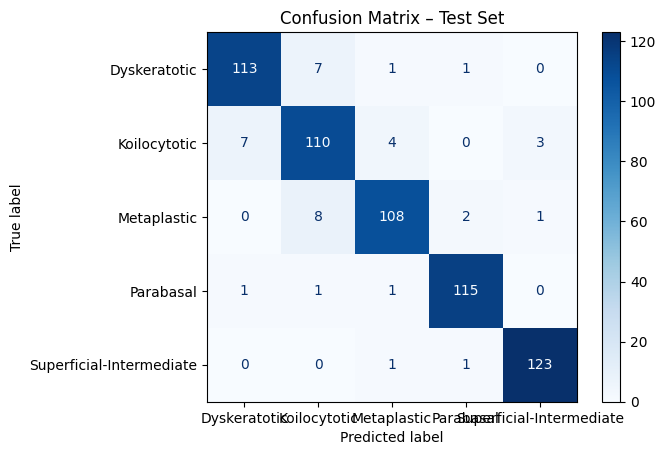

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[
        "Dyskeratotic",
        "Koilocytotic",
        "Metaplastic",
        "Parabasal",
        "Superficial-Intermediate"
    ]
)

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Test Set")
plt.show()